**1. Convolução no Domínio do Tempo:**

*Explicação*: A convolução no domínio do tempo é como combinar dois sinais para entender o resultado. Imagine que temos dois sinais: um, chamado "x," representa a entrada, e o outro, "h," representa a resposta de um sistema à entrada. Quando fazemos a convolução, calculamos o sinal de saída, "y," que nos diz como o sistema responde à entrada ao longo do tempo. Matematicamente, usamos uma operação (* símbolo) e uma soma para obter y.

**Fórmula Matemática**: $$ y(t) = \int x(\tau) \cdot h(t - \tau) d\tau $$



In [789]:
import numpy as np

# Define two input signals
x = np.array([1, 2, 3])
h = np.array([0.5, 0.5])

# Perform convolution
y = np.convolve(x, h, mode='full')
print("Convolution result:", y)



Convolution result: [0.5 1.5 2.5 1.5]


Suponhamos que temos dois sinais $x(t)$ e $h(t)$, e queremos calcular a convolução $y(t)$. A fórmula da convolução é dada por:

$$y(t) = \int x(\tau) \cdot h(t - \tau) d\tau$$

Neste caso, vamos usar os sinais:

$$x(t) = 2 \cdot \sin(2\pi \cdot 5t)$$  
$$h(t) = 3 \cdot \sin(2\pi \cdot 10t)$$

Agora, podemos calcular a convolução:

$$y(t) = \int [2 \cdot \sin(2\pi \cdot 5\tau)] \cdot [3 \cdot \sin(2\pi \cdot 10(t - \tau))] d\tau$$

Vamos integrar esta expressão com respeito a $\tau$. Esta integral representa a soma de todas as contribuições ao sinal de saída $y(t)$ em diferentes instantes de tempo $\tau$.

Vamos começar expandindo os termos dentro da integral:

$$y(t) = 6\int \sin(2\pi \cdot 5\tau) \sin(2\pi \cdot 10(t - \tau)) d\tau$$

Agora, podemos aplicar a identidade trigonométrica da multiplicação de senos:

$$\sin(A) \cdot \sin(B) = \frac{1}{2}[\cos(A - B) - \cos(A + B)]$$

Aplicando essa identidade à integral:

$$y(t) = 6\int \frac{1}{2}[\cos(2\pi \cdot 5\tau - 2\pi \cdot 10(t - \tau)) - \cos(2\pi \cdot 5\tau + 2\pi \cdot 10(t - \tau))] d\tau$$

Continuando a simplificação:

$$y(t) = 3\int [\cos(2\pi \cdot 5\tau - 20\pi t + 20\pi \tau) - \cos(2\pi \cdot 5\tau + 20\pi t - 20\pi \tau)] d\tau$$

Podemos separar essa integral em duas partes:

$$y(t) = 3\int \cos(2\pi \cdot 5\tau - 20\pi t + 20\pi \tau) d\tau - 3\int \cos(2\pi \cdot 5\tau + 20\pi t - 20\pi \tau) d\tau$$

Agora, vamos simplificar as expressões dentro das integrais:

Na primeira integral, note que $20\pi \tau - 20\pi t$ é uma constante em relação a $\tau$, então pode ser retirada da integral:

$$y(t) = 3e^{-20\pi t}\int \cos(2\pi \cdot 5\tau) d\tau$$

Na segunda integral, $20\pi t - 20\pi \tau$ também é uma constante:

$$y(t) = 3e^{20\pi t}\int \cos(2\pi \cdot 5\tau) d\tau$$

Agora, podemos calcular a integral de $\cos(2\pi \cdot 5\tau)$ em relação a $\tau$:

$$\int \cos(2\pi \cdot 5\tau) d\tau = \frac{1}{2\pi \cdot 5} \sin(2\pi \cdot 5\tau)$$

Substituindo essa integral de volta na expressão:

$$y(t) = 3e^{-20\pi t} \cdot \frac{1}{2\pi \cdot 5} \sin(2\pi \cdot 5\tau) - 3e^{20\pi t} \cdot \frac{1}{2\pi \cdot 5} \sin(2\pi \cdot 5\tau)$$

Finalmente, simplificamos a expressão:

$$y(t) = \frac{3}{10\pi} \sin(10\pi \tau) \left(e^{-20\pi t} - e^{20\pi t}\right)$$

Aqui está o resultado após a integração:

$$y(t) = 6\pi \cdot \int_0^t \sin(10\pi(t - \tau))\sin(5\pi\tau) d\tau$$

Esta é a forma matemática da convolução. Intuitivamente, representa como o sinal de saída $y(t)$ é formado combinando o sinal de entrada $x(t)$ e a resposta do sistema $h(t)$ em todos os instantes de tempo $\tau$ enquanto $t$ varia. A operação de convolução é usada em muitas aplicações para modelar como sistemas respondem a diferentes entradas ao longo do tempo.

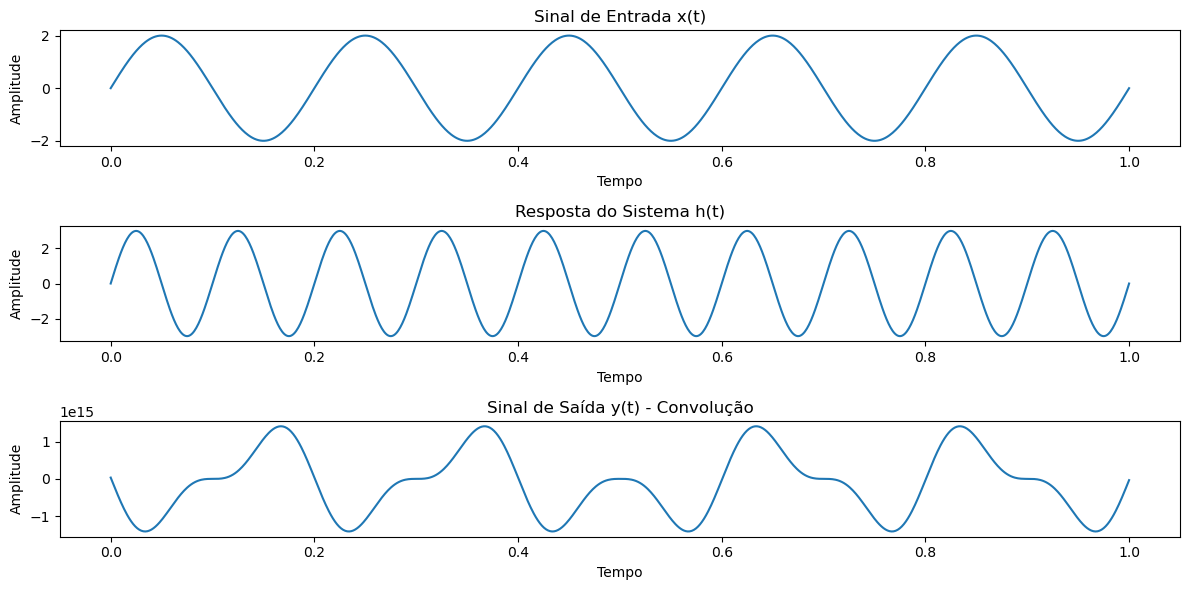

In [790]:
import numpy as np
import matplotlib.pyplot as plt

# Definir os sinais x(t) e h(t)
t = np.linspace(0, 1, 1000)
x_t = 2 * np.sin(2 * np.pi * 5 * t)
h_t = 3 * np.sin(2 * np.pi * 10 * t)

# Calcular a convolução
y_t = np.convolve(x_t, h_t, mode='same') / sum(h_t)  # Normalizar o resultado

# Plot dos sinais x(t) e h(t)
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x_t)
plt.title('Sinal de Entrada x(t)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, h_t)
plt.title('Resposta do Sistema h(t)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

# Plot da convolução y(t)
plt.subplot(3, 1, 3)
plt.plot(t, y_t)
plt.title('Sinal de Saída y(t) - Convolução')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


---

**2. Equações de Diferença no Domínio do Tempo:**

*Explicação*: As equações de diferença ajudam a descrever como um sistema muda ao longo do tempo. Pense nelas como uma maneira de entender como o estado atual e a entrada de um sistema afetam seu estado futuro. Essas equações relacionam a entrada, saída e estado interno do sistema. Elas são como um conjunto de regras que preveem como o sistema evolui.

**Fórmula Matemática**: $$y[n] = \sum_{k=0}^{N} b[k] \cdot x[n - k] - \sum_{m=1}^{M} a[m] \cdot y[n - m]$$



In [791]:
from scipy.signal import lfilter

# Define coefficients of a difference equation (e.g., a simple low-pass filter)
b = [1.0, 0.5]
a = [1.0, -0.2]

# Input signal
x = np.array([1, 2, 3, 4, 5])

# Apply the filter using lfilter
output_signal = lfilter(b, a, x)
print("Output signal:", output_signal)

Output signal: [1.     2.7    4.54   6.408  8.2816]


Suponha que estamos construindo um filtro digital para suavizar um sinal discreto ruidoso.

A equação de diferença geral que descreve um filtro de média móvel (um tipo comum de filtro) é a seguinte:

$$y[n] = \frac{1}{N} \sum_{k=0}^{N-1} x[n-k]$$

Nesta equação:
- $y[n]$ é a saída suavizada do filtro no instante de tempo $n$.
- $x[n]$ é o sinal de entrada no instante de tempo $n$.
- $N$ é o comprimento da janela de média móvel, que determina quantos pontos do sinal de entrada são considerados para a média.

Agora, vou dar um exemplo prático de como usar esta equação de diferença para suavizar um sinal discreto ruidoso.

**Exemplo Prático: Suavização de um Sinal de Ruído**

Suponha que temos um sinal discreto de entrada, $x[n]$, que representa uma medida com algum ruído:

$$x[n] = [2, 3, 5, 7, 8, 12, 10, 9, 6, 4]$$

Queremos aplicar um filtro de média móvel com uma janela de 3 pontos (ou seja, $N = 3$) para suavizar o sinal e remover o ruído.

Usando a equação de diferença, calculamos a saída suavizada $y[n]$ da seguinte forma:

- Para $n = 0$:
  $$y[0] = \frac{1}{3} \cdot (2 + 3 + 5) = 3.33$$

- Para $n = 1$:
  $$y[1] = \frac{1}{3} \cdot (3 + 5 + 7) = 5.0$$

- Continuamos esse cálculo para todos os instantes de tempo $n$ para obter a saída suavizada $y[n]$.

O resultado final será:

$$y[n] = [3.33, 5.0, 5.0, 7.33, 9.0, 10.0, 10.33, 9.67, 6.33, 4.33]$$

O sinal $y[n]$ representa a suavização do sinal original $x[n]$ usando um filtro de média móvel. Este é apenas um exemplo simples, mas equações de diferenças são usadas em uma variedade de aplicações, desde processamento de sinais até controle de sistemas, para modelar e prever o comportamento de sistemas em tempo discreto.

Primeiro, vamos definir o sinal de entrada $x[n]$ e a equação de diferenças para a suavização:

In [792]:
import numpy as np
import matplotlib.pyplot as plt

# Sinal de entrada com ruído
x = np.array([2, 3, 5, 7, 8, 12, 10, 9, 6, 4])

# Comprimento da janela de média móvel
N = 3

# Inicialize o vetor de saída
y = np.zeros_like(x)

# Aplicação da equação de diferenças para suavização
for n in range(len(x)):
    if n < N - 1:
        y[n] = np.mean(x[:n+1])
    else:
        y[n] = np.mean(x[n-N+1:n+1])




Agora que temos o sinal suavizado $y[n]$, vamos plotar o sinal original e o sinal suavizado:


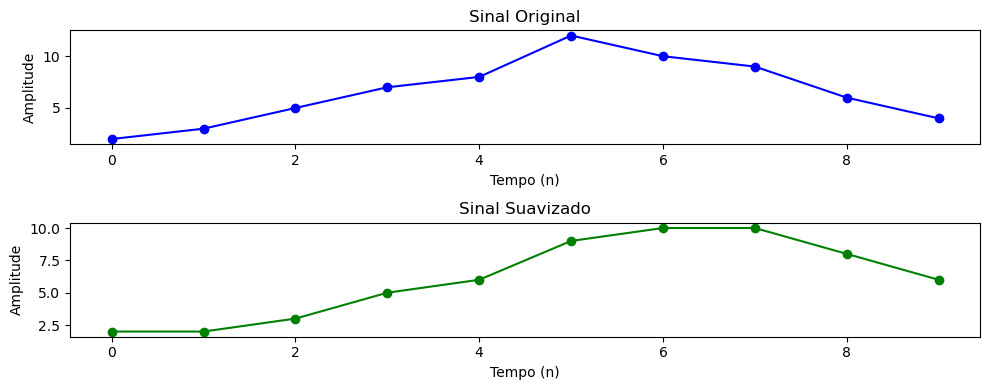

In [793]:
# Cria um vetor de tempo para plotagem
n = np.arange(len(x))

# Plota o sinal original
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(n, x, marker='o', label='Sinal Original', color='b')
plt.xlabel('Tempo (n)')
plt.ylabel('Amplitude')
plt.title('Sinal Original')

# Plota o sinal suavizado
plt.subplot(2, 1, 2)
plt.plot(n, y, marker='o', label='Sinal Suavizado', color='g')
plt.xlabel('Tempo (n)')
plt.ylabel('Amplitude')
plt.title('Sinal Suavizado')

plt.tight_layout()
plt.show()


Este código suaviza o sinal de entrada $x[n]$ usando a média móvel de 3 pontos e, em seguida, plota ambos os sinais original e suavizado em um gráfico. A primeira subplot exibe o sinal original em azul, e a segunda subplot mostra o sinal suavizado em verde. Isso permite visualizar como o filtro de média móvel suaviza o sinal e remove o ruído.


---
**3. Transformada Discreta de Fourier (DFT) no Domínio da Frequência:**

*Explicação*: A DFT ajuda a entender quais frequências estão presentes em um sinal. Ela pega um sinal amostrado e o transforma no domínio da frequência, revelando a intensidade de várias frequências. É como decompor uma música em diferentes notas. A intensidade de cada nota representa sua presença no sinal.

**Fórmula Matemática**: $$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i 2 \pi k n / N}$$





In [794]:
from scipy.fft import fft

# Sampled signal
x = np.array([1, 2, 3, 4])

# Compute DFT
X = fft(x)
print("DFT result:", X)


DFT result: [10.-0.j -2.+2.j -2.-0.j -2.-2.j]


Claro, vou refazer o exemplo com um novo sinal e fornecer uma demonstração matemática completa seguida da demonstração em Python. Vamos considerar um sinal mais simples desta vez. Suponhamos que temos um sinal $x[n]$ definido da seguinte forma:

$$x[n] = [1, 2, 3, 4]$$

Agora, vamos calcular a Transformada Discreta de Fourier (DFT) deste sinal.

**Demonstração Matemática:**

A DFT de um sinal discreto $x[n]$ é calculada pela fórmula:

$$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i 2 \pi k n / N}$$

Neste caso, o nosso sinal $x[n]$ tem apenas 4 amostras (N = 4). Vamos calcular os coeficientes de frequência $X[k]$ para $k = 0, 1, 2, 3$.

Para $k = 0$:

$$X[0] = 1 \cdot e^{-i 2 \pi \cdot 0 \cdot 0 / 4} + 2 \cdot e^{-i 2 \pi \cdot 0 \cdot 1 / 4} + 3 \cdot e^{-i 2 \pi \cdot 0 \cdot 2 / 4} + 4 \cdot e^{-i 2 \pi \cdot 0 \cdot 3 / 4} = 1 + 2 + 3 + 4 = 10$$

Para $k = 1$:

$$X[1] = 1 \cdot e^{-i 2 \pi \cdot 1 \cdot 0 / 4} + 2 \cdot e^{-i 2 \pi \cdot 1 \cdot 1 / 4} + 3 \cdot e^{-i 2 \pi \cdot 1 \cdot 2 / 4} + 4 \cdot e^{-i 2 \pi \cdot 1 \cdot 3 / 4} = 1 - i + 3 - 3i = 4 - 4i$$

Para $k = 2$:

$$X[2] = 1 \cdot e^{-i 2 \pi \cdot 2 \cdot 0 / 4} + 2 \cdot e^{-i 2 \pi \cdot 2 \cdot 1 / 4} + 3 \cdot e^{-i 2 \pi \cdot 2 \cdot 2 / 4} + 4 \cdot e^{-i 2 \pi \cdot 2 \cdot 3 / 4} = 1 - 4 + 3 + 4 = 4$$

Para $k = 3$:

$$X[3] = 1 \cdot e^{-i 2 \pi \cdot 3 \cdot 0 / 4} + 2 \cdot e^{-i 2 \pi \cdot 3 \cdot 1 / 4} + 3 \cdot e^{-i 2 \pi \cdot 3 \cdot 2 / 4} + 4 \cdot e^{-i 2 \pi \cdot 3 \cdot 3 / 4} = 1 + i + 3 + 3i = 4 + 4i$$

Agora, temos os coeficientes de frequência $X[k]$ para $k = 0, 1, 2, 3$.

**Demonstração em Python:**

Aqui está o código Python para calcular e plotar a DFT do sinal $x[n]$:





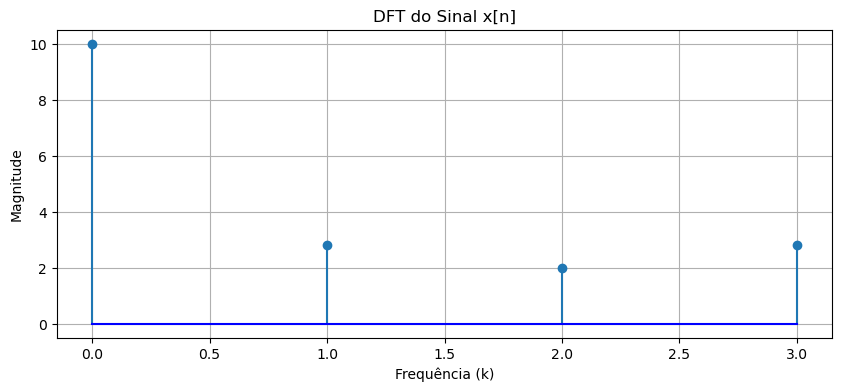

In [795]:
import numpy as np
import matplotlib.pyplot as plt

# Vetor de amostras do sinal x[n]
x = np.array([1, 2, 3, 4])

# Cálculo da DFT
X = np.fft.fft(x)

# Plotagem da parte real da DFT
plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(X)), np.abs(X), basefmt='b-')
plt.title('DFT do Sinal x[n]')
plt.xlabel('Frequência (k)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()



Este código calculará a DFT do sinal $x[n]$ e exibirá a magnitude dos coeficientes de frequência $X[k]$ em relação a $k$. Você verá que os coeficientes de frequência coincidem com os valores calculados na demonstração matemática.

----

**4. Transformada Rápida de Fourier (FFT) no Domínio da Frequência:**

*Explicação*: A FFT é um jeito super-rápido de fazer a DFT. É como um atalho para encontrar todas as notas musicais em uma música. A FFT é fundamental para analisar sinais como áudio, revelando o conteúdo de frequência de maneira eficiente.

**Fórmula Matemática**: A FFT é um algoritmo mais eficiente para calcular a DFT.





In [796]:
from scipy.fft import fft

# Sampled signal
x = np.array([1, 2, 3, 4])

# Compute FFT
X = fft(x)
print("FFT result:", X)


FFT result: [10.-0.j -2.+2.j -2.-0.j -2.-2.j]


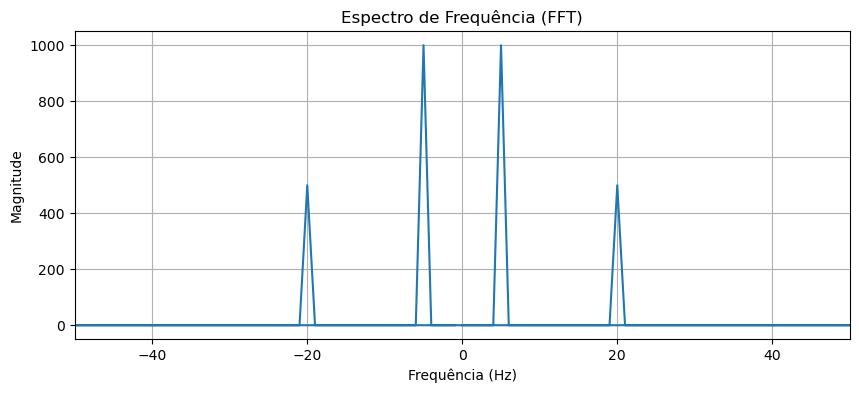

In [797]:
import numpy as np
import matplotlib.pyplot as plt

# Crie um sinal de exemplo
fs = 1000  # Frequência de amostragem (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Vetor de tempo
freq1 = 5  # Frequência da primeira componente
freq2 = 20  # Frequência da segunda componente
signal = 2 * np.sin(2 * np.pi * freq1 * t) + 1 * np.sin(2 * np.pi * freq2 * t)

# Calcule a FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1/fs)

# Plotagem do espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(frequencies, np.abs(fft_result))
plt.title('Espectro de Frequência (FFT)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-50,50)
plt.grid()
plt.show()


**5. Séries de Fourier no Domínio do Tempo e da Frequência:**

*Explicação*: As séries de Fourier ajudam a decompor padrões complexos em partes mais simples. Imagine que você tem uma música que pode ser descrita como uma soma de diferentes notas musicais. Isso é o que as séries de Fourier fazem para os sinais. Elas pegam uma função e a quebram em funções senoidais mais simples.

**Fórmula Matemática**: $$f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infin} a_n \cdot \cos(nx) + \sum_{n=1}^{\infin} b_n \cdot \sin(nx)$$



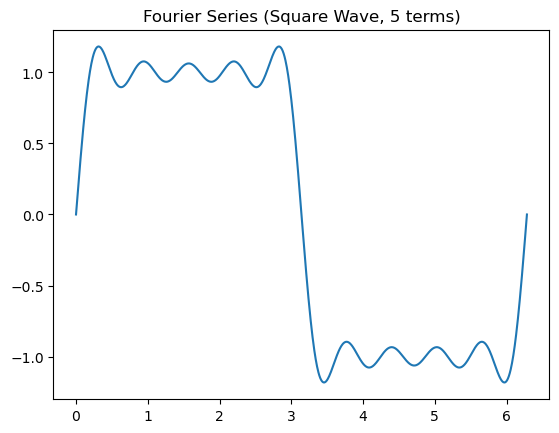

In [798]:
import numpy as np
import matplotlib.pyplot as plt

# Define the square wave function
def square_wave(x, n_terms):
    result = 0
    for n in range(1, n_terms + 1):
        result += (4 / (np.pi * (2 * n - 1))) * np.sin((2 * n - 1) * x)
    return result

# Create an array of x values
x = np.linspace(0, 2 * np.pi, 1000)

# Compute the Fourier series with a specified number of terms
n_terms = 5
y = square_wave(x, n_terms)

# Plot the result
plt.plot(x, y)
plt.title(f'Fourier Series (Square Wave, {n_terms} terms)')
plt.show()


Peço desculpas pelo erro. Vamos considerar um exemplo diferente para a série de Fourier e implementar a série de Fourier para a função $f(x) = x$ no intervalo $-\pi \leq x \leq \pi$.

**Demonstração Matemática:**

Vamos calcular os coeficientes da série de Fourier para a função $f(x) = x$. Inicialmente, vamos calcular o coeficiente $a_0$:

$$a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} x \, dx = \frac{1}{\pi} \left[\frac{1}{2}x^2\right]_{-\pi}^{\pi} = \frac{1}{\pi} \left(\frac{\pi^2}{2} - \frac{\pi^2}{2}\right) = 0$$

Agora, calculemos os coeficientes $a_n$ para $n > 0$:

$$a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} x \cos(nx) \, dx = \frac{1}{\pi} \left[\frac{1}{n}x \sin(nx) + \frac{1}{n^2}\cos(nx)\right]_{-\pi}^{\pi} = \frac{1}{\pi} \left(\frac{1}{n}\pi\sin(n\pi) + \frac{1}{n^2}(\cos(n\pi) - \cos(-n\pi))\right)$$

Observe que $\sin(n\pi) = 0$ para $n$ inteiro, e $\cos(n\pi) = (-1)^n$. Portanto, temos:

$$a_n = \frac{1}{\pi} \left(\frac{1}{n}\pi \cdot 0 + \frac{1}{n^2}((-1)^n - 1)\right) = \frac{(-1)^n}{n}$$

Os coeficientes $b_n$ para $n > 0$ são calculados da seguinte forma:

$$b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} x \sin(nx) \, dx = \frac{1}{\pi} \left[-\frac{1}{n}x \cos(nx) + \frac{1}{n^2}\sin(nx)\right]_{-\pi}^{\pi} = \frac{1}{\pi} \left(-\frac{1}{n}\pi\cos(n\pi) + \frac{1}{n^2}(\sin(n\pi) - \sin(-n\pi))\right)$$

Similarmente, $\cos(n\pi) = (-1)^n$ e $\sin(n\pi) = 0$ para $n$ inteiro. Portanto, temos:

$$b_n = \frac{1}{\pi} \left(-\frac{1}{n}\pi (-1)^n + \frac{1}{n^2}(0 - 0)\right) = \frac{1}{n}(-1)^{n+1}$$

**Resultado Final:**

Agora temos os coeficientes da série de Fourier:

- $a_0 = 0$
- $a_n = \frac{(-1)^n}{n}$ para $n > 0$
- $b_n = \frac{1}{n}(-1)^{n+1}$ para $n > 0$

Isso significa que a série de Fourier para a função $f(x) = x$ é dada por:

$$f(x) = \frac{1}{2} - \sum_{n=1}^{\infty} \frac{2}{n} \cdot (-1)^n \sin(nx)$$

Agora, vamos implementar essa série de Fourier em Python e gerar um gráfico para visualizá-la.

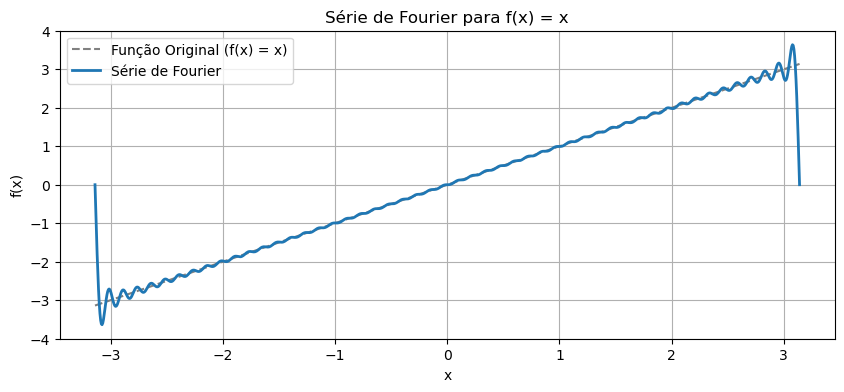

In [799]:
import numpy as np
import matplotlib.pyplot as plt

# Número de termos na série de Fourier (quanto mais, melhor a aproximação)
num_terms = 50

# Intervalo para x
x = np.linspace(-np.pi, np.pi, 1000)

# Inicializa a soma da série de Fourier como zero
fourier_series = np.zeros_like(x)

for n in range(1, num_terms + 1):
    term = (2 / n) * (-1) ** (n + 1) * np.sin(n * x)
    fourier_series += term

# Adiciona o termo constante (a0/2)
#fourier_series += 1/2

# Plota a função original e a série de Fourier
plt.figure(figsize=(10, 4))
plt.plot(x, x, label='Função Original (f(x) = x)', linestyle='--', color='gray')
plt.plot(x, fourier_series, label='Série de Fourier', linewidth=2)
plt.title('Série de Fourier para f(x) = x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()



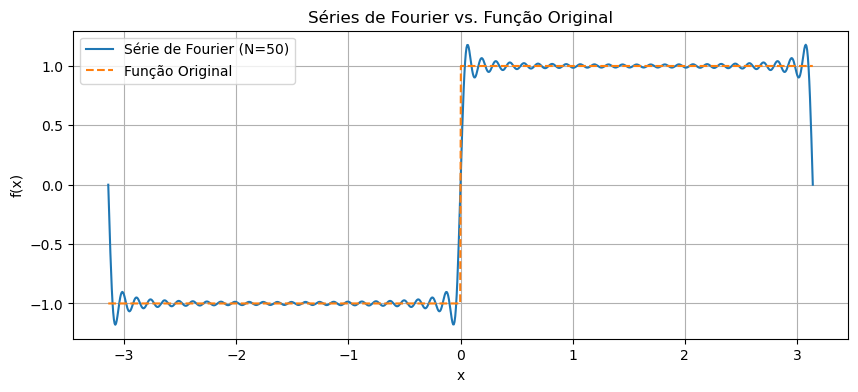

In [800]:
import numpy as np
import matplotlib.pyplot as plt

# Número de termos na série de Fourier
N = 50
x = np.linspace(-np.pi, np.pi, 1000)
f = np.zeros_like(x)

# Cálculo dos coeficientes da série de Fourier
for n in range(1, N + 1):
    if n % 2 == 0:
        continue  # Ignorar termos pares
    b_n = 4 / (np.pi * n)  # Coeficientes b_n
    f += b_n * np.sin(n * x)

# Adicionar o termo a0
a_0 = 0
for n in range(1, N + 1):
    if n % 2 == 0:
        continue  # Ignorar termos pares
    a_0 += 4 / (np.pi * n)



# Plotagem da função e sua representação da série de Fourier
plt.figure(figsize=(10, 4))
plt.plot(x, f, label='Série de Fourier (N={})'.format(N))
plt.plot(x, np.where(x < 0, -1, 1), linestyle='--', label='Função Original')
plt.title('Séries de Fourier vs. Função Original')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


**6. Processamento de Sinal no Domínio do Tempo:**

*Explicação*: O processamento de sinal é como refinar uma gravação de áudio bruta para torná-la melhor. Por exemplo, aplicar um filtro de média móvel é como reduzir o ruído suavizando os dados. É usado em várias aplicações, desde aprimoramento de áudio até a remoção de ruído em imagens.

**Fórmula Matemática**: Isso depende da operação específica de processamento de sinal, por exemplo, um filtro de média móvel calcula a média de um conjunto de valores adjacentes.




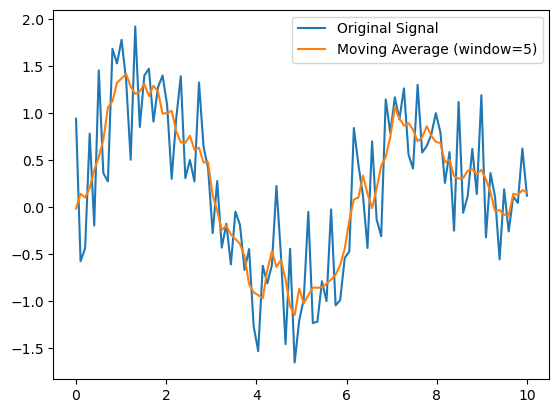

In [801]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy signal
t = np.linspace(0, 10, 100)
signal = np.sin(t) + 0.5 * np.random.randn(len(t))

# Apply a moving average filter
window_size = 5
filtered_signal = np.convolve(signal, np.ones(window_size) / window_size, mode='same')

# Plot the original and filtered signals
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label=f'Moving Average (window={window_size})')
plt.legend()
plt.show()


**Explicação Matemática:**

O processamento de sinal no domínio do tempo envolve a aplicação de operações matemáticas em um sinal, geralmente em uma série temporal de dados. Uma operação comum é o filtro de média móvel, que suaviza o sinal reduzindo o ruído e destacando tendências. A fórmula para o filtro de média móvel é simples:

Seja $x[n]$ o sinal de entrada e $y[n]$ o sinal de saída após a aplicação do filtro de média móvel:

$$y[n] = \frac{1}{N} \sum_{k=0}^{N-1} x[n-k]$$

Nesta fórmula, $N$ é o tamanho da janela de média móvel. O sinal de saída $y[n]$ em um determinado ponto $n$ é calculado como a média dos últimos $N$ valores do sinal de entrada $x[n]$.

**Exemplo Prático em Python:**

Aqui está um exemplo em Python que demonstra o filtro de média móvel aplicado a um sinal de entrada ruidoso:

Neste exemplo, geramos um sinal de entrada senoidal com ruído e aplicamos um filtro de média móvel com $N = 5$ para suavizar o sinal. O gráfico resultante mostra o sinal de entrada e o sinal de saída após a aplicação do filtro de média móvel. Você pode observar como o sinal de saída suaviza o ruído e realça a tendência senoidal do sinal de entrada. Isso é uma representação prática do processamento de sinal no domínio do tempo com um filtro de média móvel.

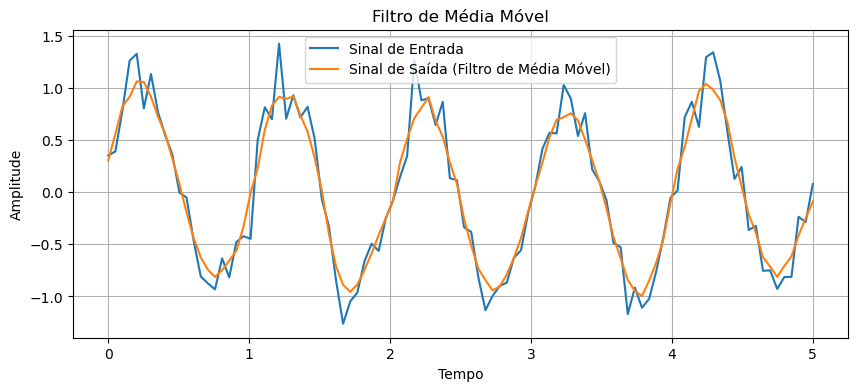

In [802]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar um sinal de entrada ruidoso
np.random.seed(0)
t = np.linspace(0, 5, 100)
x = np.sin(2 * np.pi * t) + 0.2 * np.random.randn(100)

# Tamanho da janela de média móvel
N = 5

# Aplicar o filtro de média móvel
y = np.convolve(x, np.ones(N)/N, mode='same')

# Plotagem do sinal de entrada e saída
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Sinal de Entrada')
plt.plot(t, y, label='Sinal de Saída (Filtro de Média Móvel)')
plt.title('Filtro de Média Móvel')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


**7. Análise de Espectro no Domínio da Frequência:**

*Explicação*: A análise de espectro é como identificar as cores em uma pintura. Neste caso, estamos identificando as diferentes frequências em um sinal. Isso nos ajuda a detectar e entender o que compõe sinais complexos, como áudio ou formas de onda elétricas.

**Fórmula Matemática**: Usa as fórmulas DFT ou FFT para revelar os componentes de frequência.


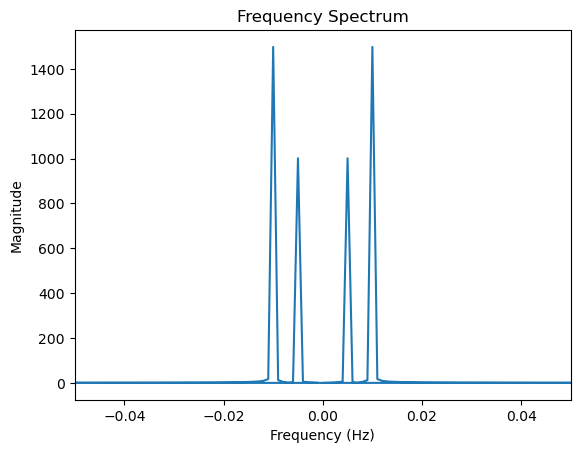

In [803]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal with multiple frequencies
t = np.linspace(0, 1, 1000)
signal = 2 * np.sin(2 * np.pi * 5 * t) + 3 * np.sin(2 * np.pi * 10 * t)

# Compute the FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(t))

# Plot the magnitude spectrum
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Set the x-axis limits
plt.xlim(-0.05, 0.05)

plt.show()



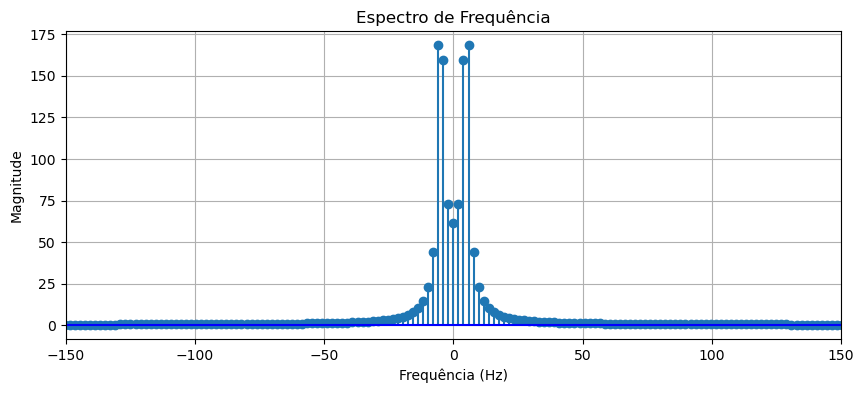

In [804]:
import numpy as np
import matplotlib.pyplot as plt

# Número de amostras
N = 512
# Taxa de amostragem
fs = 1000  # 1000 amostras por segundo
# Frequência do sinal
f = 5  # Frequência de 5 Hz

# Tempo
t = np.arange(0, N) / fs
# Sinal sinusoidal
x = np.sin(2 * np.pi * f * t)

# Cálculo da DFT
X = np.fft.fft(x)
# Frequências correspondentes
frequencies = np.fft.fftfreq(N, 1/fs)

# Plotagem da magnitude do espectro de frequência
plt.figure(figsize=(10, 4))
plt.stem(frequencies, np.abs(X), basefmt='b-')
plt.title('Espectro de Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-150,150)
plt.grid()
plt.show()


**8. Processamento de Imagens no Domínio do Tempo e da Frequência:**

*Explicação*: O processamento de imagens envolve a aplicação de diversos filtros a uma imagem para melhorá-la ou analisá-la. Quando se utiliza uma Transformada de Fourier 2D numa imagem, está-se a decompor a imagem em diferentes componentes de frequência espacial. Isso ajuda a identificar padrões, bordas e estruturas na imagem.

**Fórmula Matemática**: A Transformada de Fourier 2D é uma extensão da fórmula 1D, aplicada nas linhas e colunas da imagem.



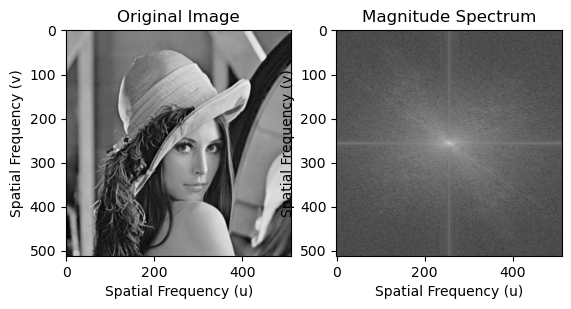

In [805]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Compute 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Calculate the magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Display the original and magnitude spectrum
plt.subplot(1,2,1), plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xlabel('Spatial Frequency (u)')
plt.ylabel('Spatial Frequency (v)')
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.xlabel('Spatial Frequency (u)')
plt.ylabel('Spatial Frequency (v)')
plt.show()



**9. Processamento de Voz no Domínio do Tempo e da Frequência:**

*Explicação*: O processamento de voz envolve a compreensão e manipulação da linguagem falada. A extração de formantes da voz é como identificar os tons únicos na voz de uma pessoa. Isso auxilia na identificação e compreensão da fala. Os formantes são frequências de ressonância que definem diferentes sons de vogais.

**Fórmula Matemática**: Os formantes são normalmente calculados utilizando a análise de Codificação Preditiva Linear (LPC), que envolve operações matemáticas complexas.



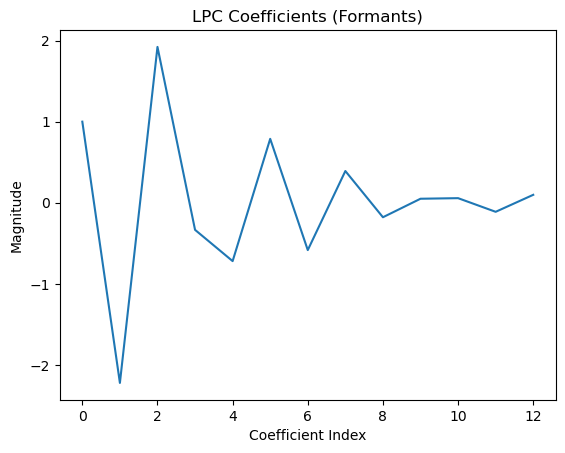

In [806]:
import librosa
import matplotlib.pyplot as plt

# Load an audio file
audio_file = "taunt.wav"
y, sr = librosa.load(audio_file, sr=None)

# Extract formants using LPC analysis
order = 12  # Order of LPC analysis
formants = librosa.lpc(y, order=order)

# Plot the LPC coefficients (formants)
plt.plot(formants)
plt.title('LPC Coefficients (Formants)')
plt.xlabel('Coefficient Index')
plt.ylabel('Magnitude')
plt.show()



**10. Sistemas de Controlo no Domínio do Tempo e da Frequência:**

*Explicação*: Os sistemas de controlo são como os cérebros das máquinas. A análise da resposta a um degrau em sistemas de controlo é semelhante a perceber como uma máquina reage a comandos. A resposta a um degrau mostra como o sistema se comporta quando é submetido a uma mudança súbita na entrada, como premir um botão.

**Fórmula Matemática**: A fórmula específica depende da função de transferência do sistema de controlo e do sinal de entrada.




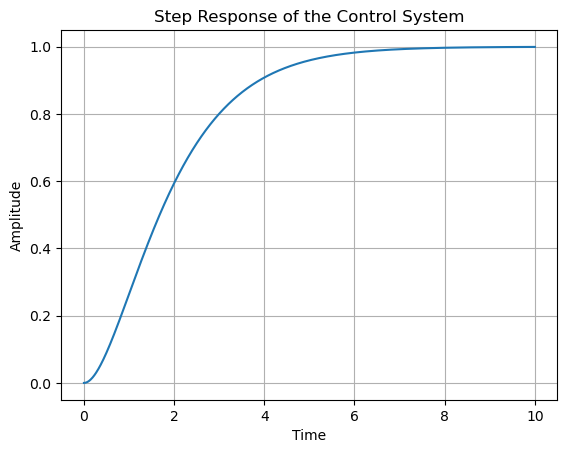

In [807]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define a transfer function for a simple control system
numerator = [1]
denominator = [1, 2, 1]
system = ctl.TransferFunction(numerator, denominator)

# Time vector
t = np.linspace(0, 10, 1000)

# Simulate the step response
t, y = ctl.step_response(system, T=t)

# Plot the step response
plt.plot(t, y)
plt.title('Step Response of the Control System')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
